## Titanic 생존 예측

```titanic.ipynb```

In [20]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

titanic = sns.load_dataset('titanic')

### KNN 분류

### Logistic회귀 분류

### 결정트리 분류


📌 [KNN]
정확도(Accuracy): 0.7622
분류 리포트:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        87
           1       0.68      0.73      0.71        56

    accuracy                           0.76       143
   macro avg       0.75      0.76      0.75       143
weighted avg       0.77      0.76      0.76       143


📌 [로지스틱 회귀]
정확도(Accuracy): 0.7483
분류 리포트:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143


📌 [결정트리]
정확도(Accuracy): 0.7552
분류 리포트:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        87
           1       0.68      0.70      0.69        56

    accuracy                           0.76       143
   

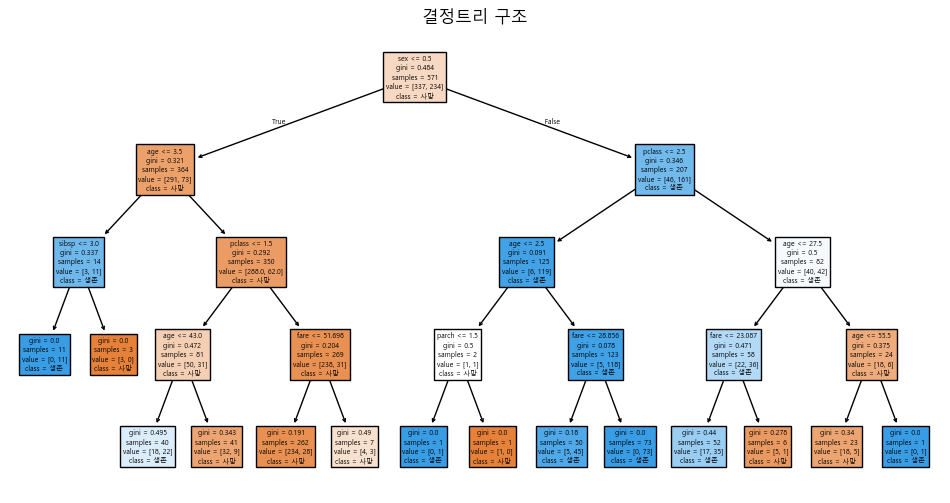

In [21]:
# 🔤 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 📦 데이터 불러오기
titanic = sns.load_dataset('titanic')

# 💡 주요 특성 선택 + 결측 제거
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()

# 성별 문자 → 숫자 인코딩
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 🎯 입력(X), 타겟(y)
X = df.drop('survived', axis=1)
y = df['survived']

# ✂️ 훈련/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 표준화 (KNN, 로지스틱 회귀에 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====================
# 1️⃣ KNN 분류
# ====================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# ====================
# 2️⃣ 로지스틱 회귀
# ====================
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)

# ====================
# 3️⃣ 결정트리 분류
# ====================
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)  # 결정트리는 스케일링 불필요
tree_pred = tree.predict(X_test)

# ====================
# 📊 결과 비교 함수
# ====================
def evaluate(name, y_true, y_pred):
    print(f"\n📌 [{name}]")
    print(f"정확도(Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print("분류 리포트:\n", classification_report(y_true, y_pred))

# 📝 결과 출력
evaluate("KNN", y_test, knn_pred)
evaluate("로지스틱 회귀", y_test, logreg_pred)
evaluate("결정트리", y_test, tree_pred)

# 🌳 결정트리 시각화
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=["사망", "생존"], filled=True)
plt.title("결정트리 구조")
plt.show()

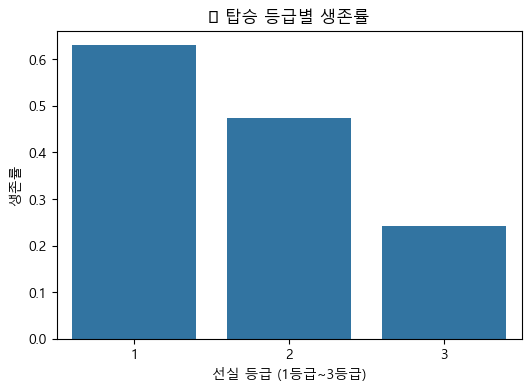

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 탑승 등급별 생존률 막대 그래프
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='pclass', y='survived', ci=None)
plt.title('🚢 탑승 등급별 생존률')
plt.xlabel('선실 등급 (1등급~3등급)')
plt.ylabel('생존률')
plt.show()

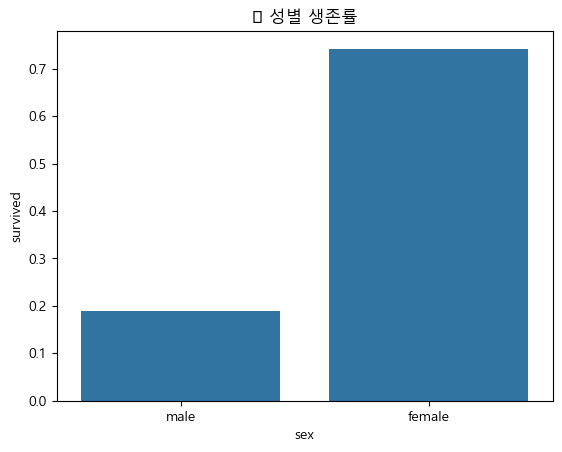

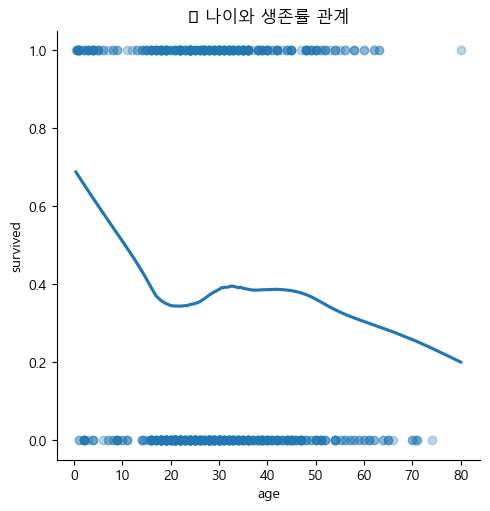

In [23]:
# 성별에 따른 생존률
sns.barplot(data=titanic, x='sex', y='survived', ci=None)
plt.title("🧍‍ 성별 생존률")
plt.show()

# 나이별 생존률 경향 (선형 회귀선 포함)
sns.lmplot(data=titanic, x='age', y='survived', lowess=True, scatter_kws={'alpha':0.3})
plt.title("👶 나이와 생존률 관계")
plt.show()

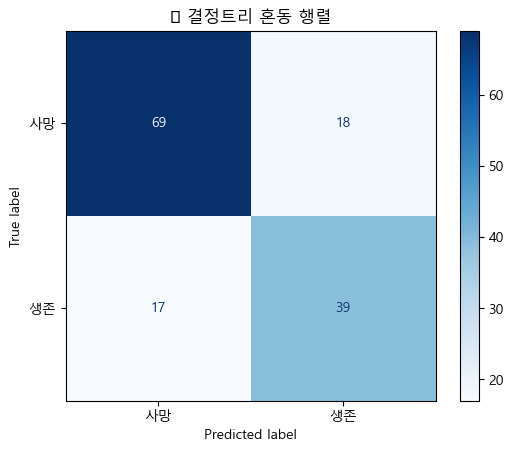

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 예: 결정트리 모델 기준
cm = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["사망", "생존"])
disp.plot(cmap='Blues')
plt.title("📊 결정트리 혼동 행렬")
plt.show()

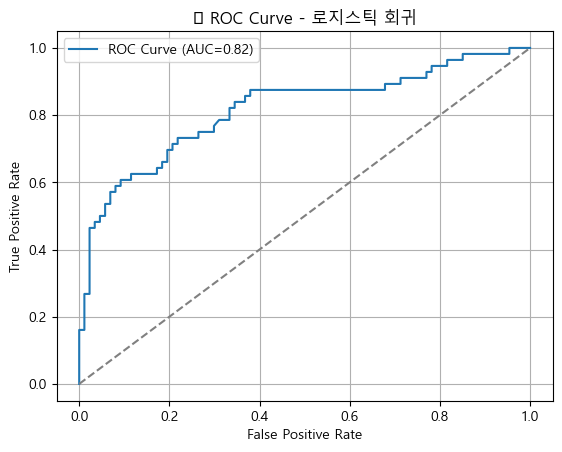

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# 예: 로지스틱 회귀 기준
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🎯 ROC Curve - 로지스틱 회귀")
plt.legend()
plt.grid(True)
plt.show()

# ➡ 곡선이 위로 볼록할수록 모델의 분류 성능이 좋은 상황!!!

   탑승 유형    평균 생존율
0  가족 동반  0.505650
1  혼자 탑승  0.303538


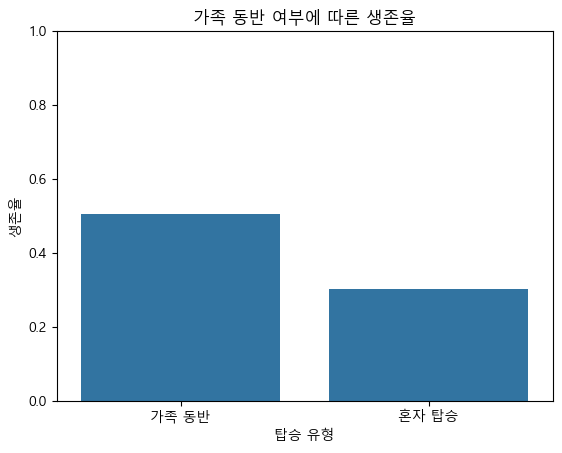

In [26]:
# sibsp (형제/배우자 수) + parch (부모/자녀 수)**를 합쳐 가족 동반 여부를 판단하고, 그에 따른 생존율 차이

import pandas as pd
import seaborn as sns

# 타이타닉 데이터 로드
titanic = sns.load_dataset('titanic')

# 필요한 열 선택 및 결측치 제거
df = titanic[['survived', 'sibsp', 'parch']].dropna()

# 가족 수 계산 (본인은 포함하지 않음)
df['family_size'] = df['sibsp'] + df['parch']

# 가족 동반 여부 변수 생성
df['with_family'] = df['family_size'].apply(lambda x: '가족 동반' if x > 0 else '혼자 탑승')

# 그룹별 생존율 계산
result = df.groupby('with_family')['survived'].mean().reset_index()
result.columns = ['탑승 유형', '평균 생존율']
print(result)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=result, x='탑승 유형', y='평균 생존율')
plt.title('가족 동반 여부에 따른 생존율')
plt.ylabel('생존율')
plt.xlabel('탑승 유형')
plt.ylim(0, 1)
plt.show()

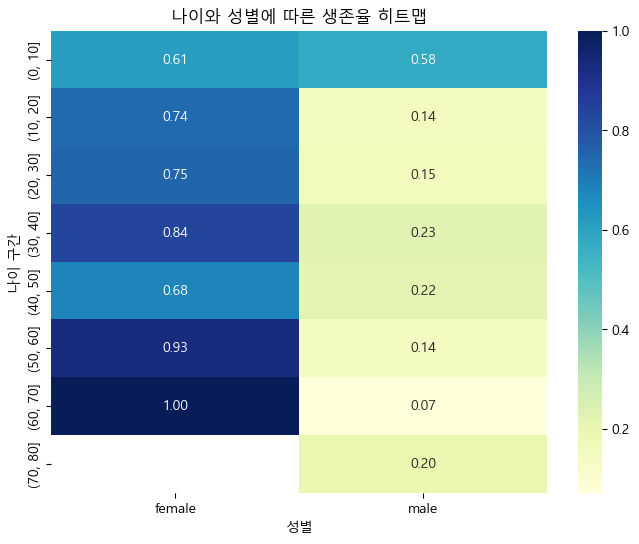

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
titanic = sns.load_dataset('titanic')

# 필요한 열 선택 및 결측치 제거
df = titanic[['survived', 'age', 'sex']].dropna()

# 나이 구간 나누기 (예: 0~10, 10~20, ..., 70~80)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# 성별/나이대별 생존율 계산
pivot = df.pivot_table(index='age_group', columns='sex', values='survived')

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('나이와 성별에 따른 생존율 히트맵')
plt.ylabel('나이 구간')
plt.xlabel('성별')
plt.show()

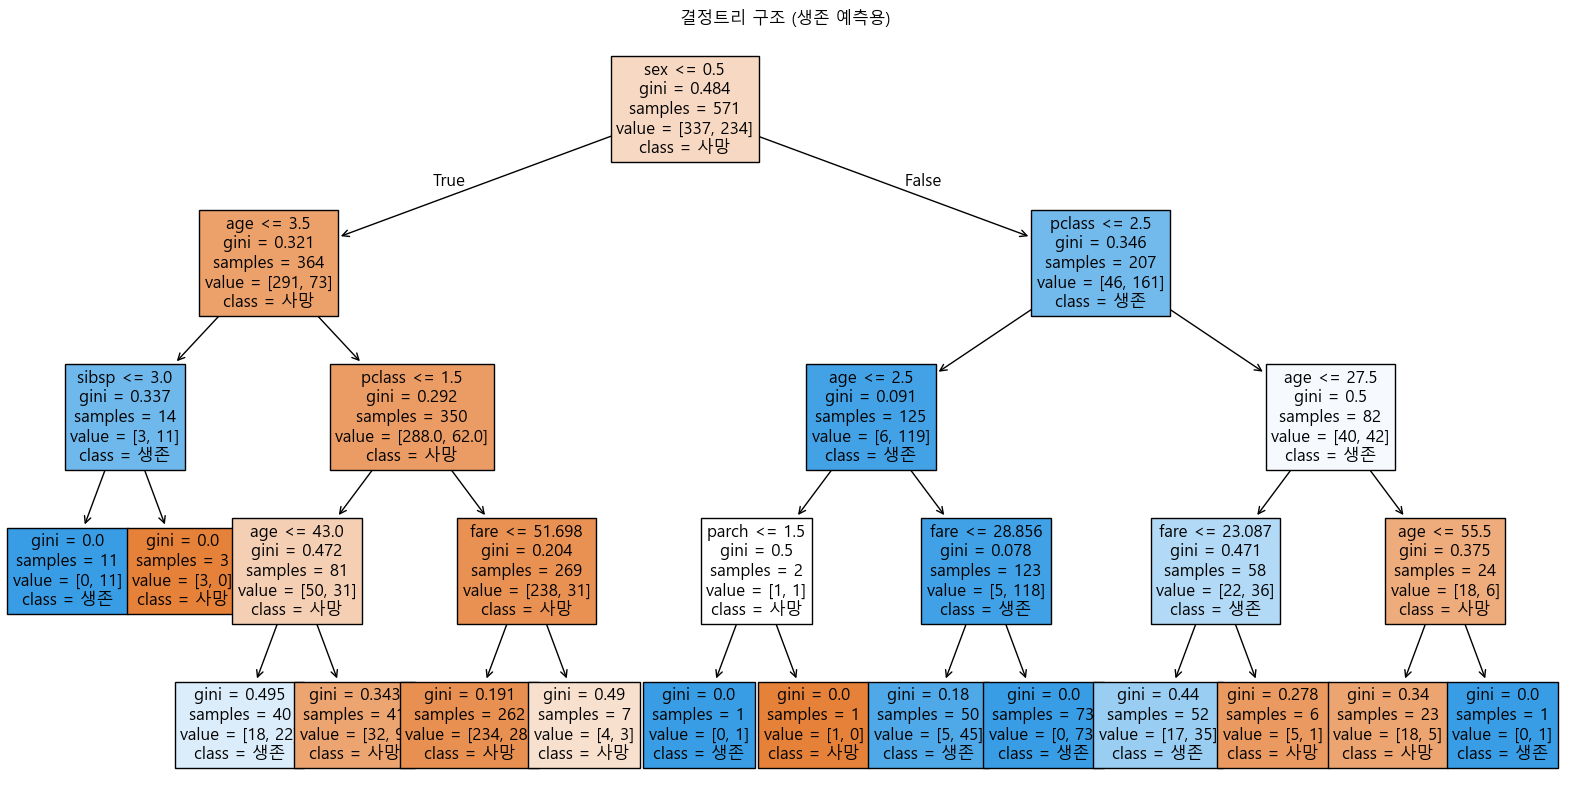

In [28]:
# 나이에 따른 생존율 결정 트리

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
titanic = sns.load_dataset('titanic')
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()

# 2. 성별 숫자화
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# 3. 입력/출력 나누기
X = df.drop('survived', axis=1)
y = df['survived']

# 4. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 결정트리 모델 학습
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# 6. 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=['사망', '생존'], filled=True, fontsize=12)
plt.title("결정트리 구조 (생존 예측용)")
plt.show()

🎯 결정 트리 기본 개념 요약

노드(Node): 하나의 조건(특성 기준)을 기반으로 데이터를 나누는 지점입니다.
루트 노드: 가장 위에 있는 시작점입니다.
리프 노드: 더 이상 분기되지 않고, 예측(class)이 결정된 최종 지점입니다.
gini: 지니 불순도 → 0에 가까울수록 한 클래스에 몰려 있음 (= 순수함)
samples: 해당 노드에 속한 샘플 개수
value = [사망 수, 생존 수]
class: 다수 클래스 = 모델의 예측값

🎯 ↑↑↑↑↑ 나이에 따른 생존율의 결정트리 해석
1. 루트 노드 (맨 위):
sex <= 0.5 → 남성 (0), 여성(1)
gini = 0.484 → 섞여 있음
samples = 571 → 전체 샘플 수
value = [337, 234] → 사망: 337, 생존: 234
class = 사망 → 다수가 사망 → 이 노드에서 기본 예측은 사망
2. 왼쪽 서브트리 (남성):
age <= 3.5
아주 어린 남성 → 샘플 수 364명
이 중 291명 사망, 73명 생존 → 예측은 여전히 사망
계속해서 pclass, age, fare 등의 조건으로 나뉘고, 마지막엔 각 리프노드에서 예측 클래스(class)가 확정됩니다.
3. 오른쪽 서브트리 (여성):
pclass <= 2.5
1등석/2등석 여성 → 생존율 높음
gini = 0.346 → 좀 섞여 있음
value = [46, 161] → 생존이 더 많음 → class = 생존
즉, 여성이고 객실등급이 좋을수록 생존할 확률이 높다는 것을 학습한 것.

📌 전체 트리에서 얻을 수 있는 통찰
sex가 가장 먼저 나왔음 - 성별이 생존 예측에서 가장 강력한 변수임을 의미
age, pclass, fare 등도 연속 사용됨 - 어린이, 고급 객실, 비싼 요금이 생존 확률과 연결
gini가 0에 가까울수록 예측이 확신에 찬 것 - 예: gini=0이면 해당 노드에 한 클래스만 있음
일부 리프노드는 매우 작은 samples- 해당 조건을 만족하는 승객이 적다는 의미 (과적합 가능성도 있음)

✅ 정리: 이 트리로 얻은 주요 규칙 예시
여성 + 1등석/2등석 → 생존 확률 매우 높음
남성 + 나이 많음 + 요금 낮음 → 사망 확률 높음
아주 어린 나이 (3세 이하) 남성도 생존할 가능성↑

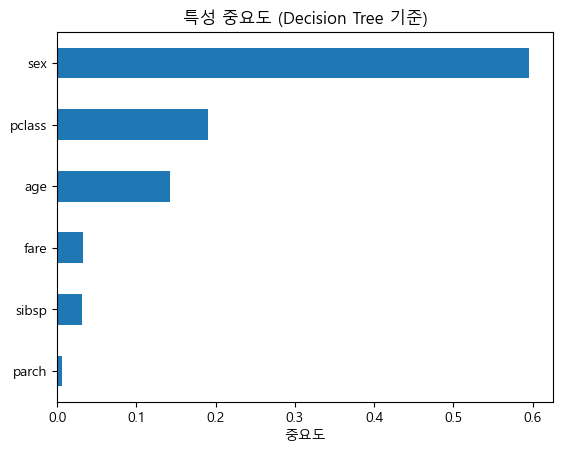

In [29]:
# 특성 중요도 시각화
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("특성 중요도 (Decision Tree 기준)")
plt.xlabel("중요도")
plt.show()

📌 Decision Tree 요약 정리
🚺 성별이 생존 예측에서 가장 큰 영향을 주는 변수임
💰 객실 등급과 나이도 그 뒤를 이어 중요한 기준이 되었음
👨‍👩‍👧‍👦 가족 동반 여부는 상대적으로 영향이 적음

## 아래 내용 쌤 작성

In [30]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# 실험실에서 기능 활성화
from sklearn.experimental import enable_iterative_imputer
# MICE (다른 특성으로 결측 대체하기)
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

titanic = sns.load_dataset('titanic')

features = ['pclass', 'sex', 'age', 'fare', 'embarked']
target = 'survived'

df = titanic[features + [target]]

# 수동 결측치 채우기 -> embarked (탑승항구) == 대부분이 'S' 
df['embarked'].fillna('S', inplace=True)

# One-Hot Encoding (OHE) -> 범주형 데이터를 T/F로 이루어진 여러개의 컬럼으로 변환
# Pros -> 숫자 0, 1, 2 는 크기 순서가 생겨 해석이 잘못될 수 있음
# Cons -> 카테고리가 많으면 차원이 늘어남
df = pd.get_dummies(df, columns=['sex', 'embarked'])

# encoder = OneHotEncoder(sparse_output=False, drop=None)
# df_encoded = pd.DataFrame(encoder.fit_transform(df[['sex', 'embarked']]), columns=df.columns)


# MICE 결측치가 있는 변수를 다른 변수들을 이용해 반복적으로 예측
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.head()

,pclass,age,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [31]:
X = df_imputed.drop('survived', axis=1)
y = df_imputed[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

KNN 분류

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
score_knn = knn.score(X_test_scaled, y_test)
print(f'KNN: {score_knn:.5f}')

KNN: 0.81006


Logistic회귀 분류

In [35]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
score_lr = lr.score(X_test_scaled, y_test)
print(f'Logistic Regression: {score_lr:.5f}')

Logistic Regression: 0.80447


결정트리 분류

In [36]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
score_dt = dt.score(X_test, y_test)
print(f'Descision Tree: {score_dt:.5f}')

Descision Tree: 0.83799


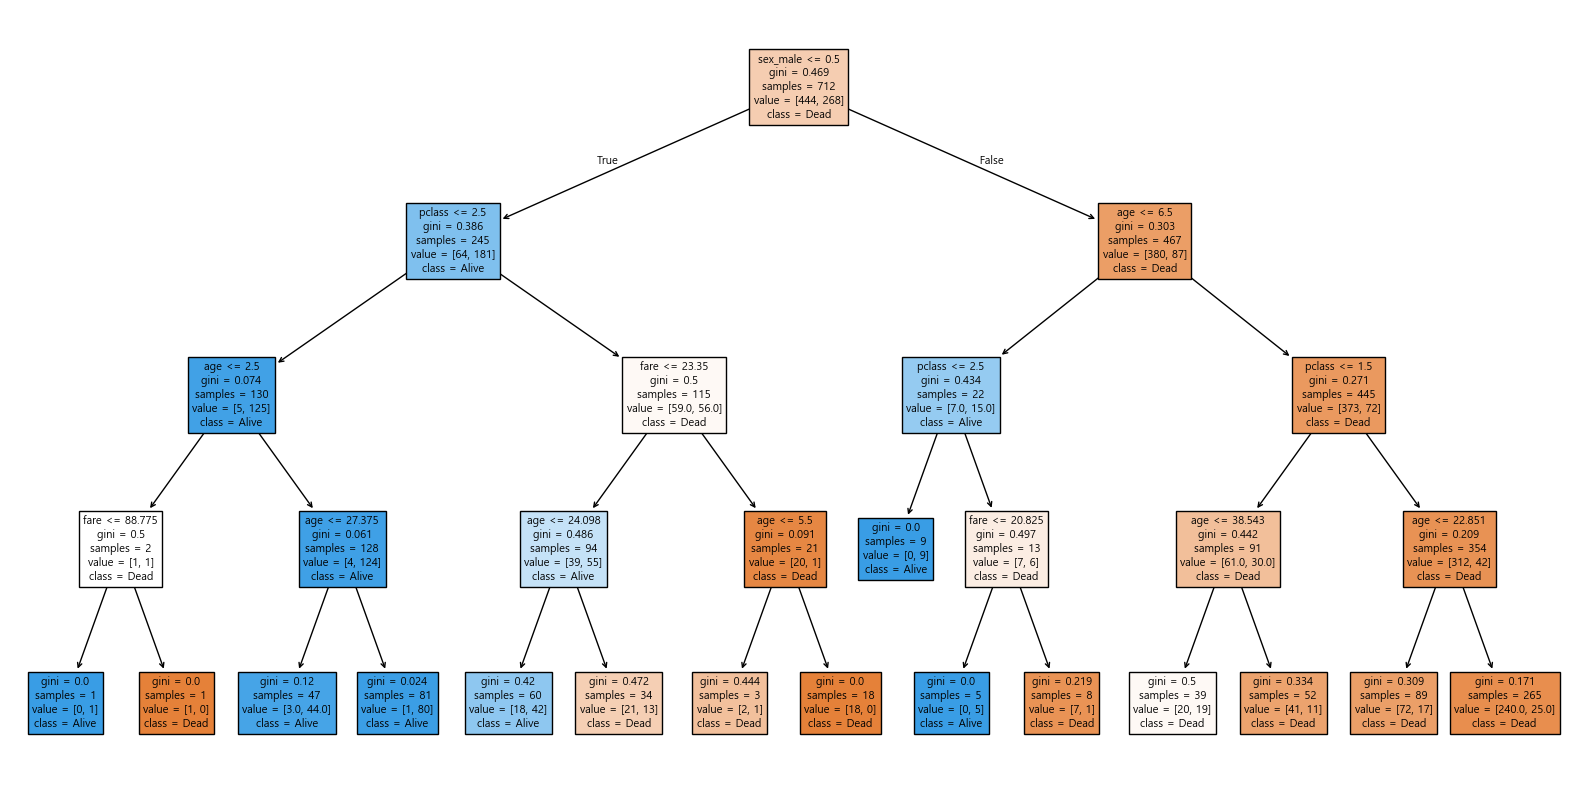

In [37]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Dead', 'Alive'], filled=True)
plt.show()